## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# load models
from create_models.arman import CnnModel, LstmModel, LstmCnnModel
from create_models.ak import ak_cnn, ak_rnn
from create_models.run_models import run_models, run_model

In [3]:
from os.path import join
import numpy as np
import pandas as pd

from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import clear_output

# Config

In [4]:
batch_size = 2048
epochs = 100
verbose = 0

In [5]:
# normalizer = "standard" # standard or minmax
# normalizer = "minmax"
normalizer = None
normalizer

In [6]:
max_trials = 10
overwrite = True
tuner = "greedy"

In [7]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
cbs = [early_stopping]

In [8]:
model_dic = {"batch_size": batch_size,
             "epochs": epochs,
             "normalizer": normalizer,
             "PCA": True,
             "cbs": cbs,
             "verbose": verbose}

In [9]:
ak_dic = {"max_trials": max_trials,
          "overwrite": overwrite,
          "tuner": tuner}

# Run Models

In [10]:
# model_func_list = [CnnModel, ak_cnn]
# model_func_list = [CnnModel, LstmModel, LstmCnnModel]
# model_func_list = [ak_cnn, ak_rnn]
model_func_list = [CnnModel, LstmModel, LstmCnnModel, ak_cnn, ak_rnn]

ak_rnn is finished!


,model_name,normalizer,PCA,duration(in s),val_loss,val_acc
2,LstmCnnModel,None,True,9,0.3829,0.8678
1,LstmModel,None,True,8,0.4826,0.8268
4,ak_rnn,None,True,222,0.4878,0.8078
0,CnnModel,None,True,11,0.8288,0.7449
3,ak_cnn,None,True,202,0.6952,0.7358


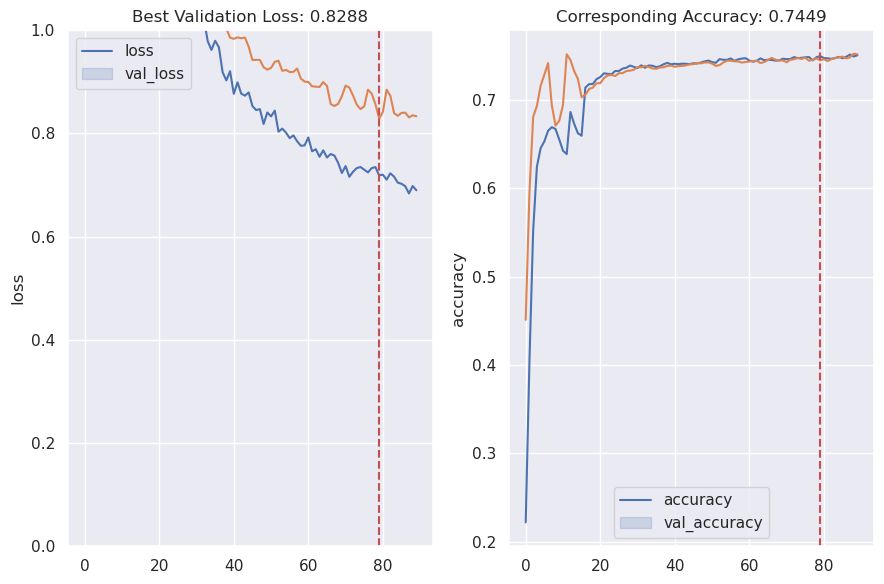

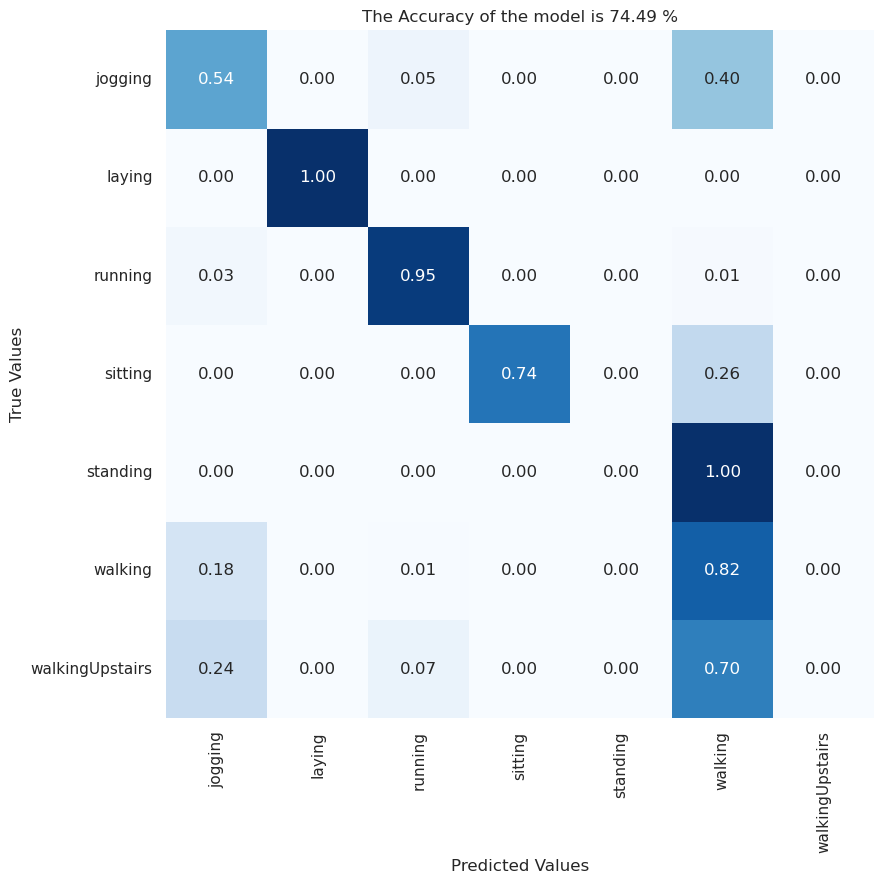

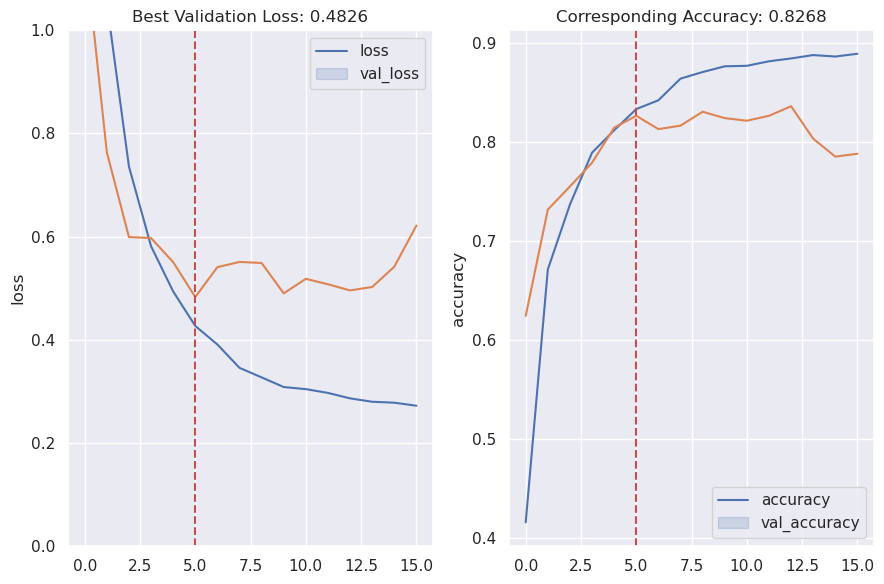

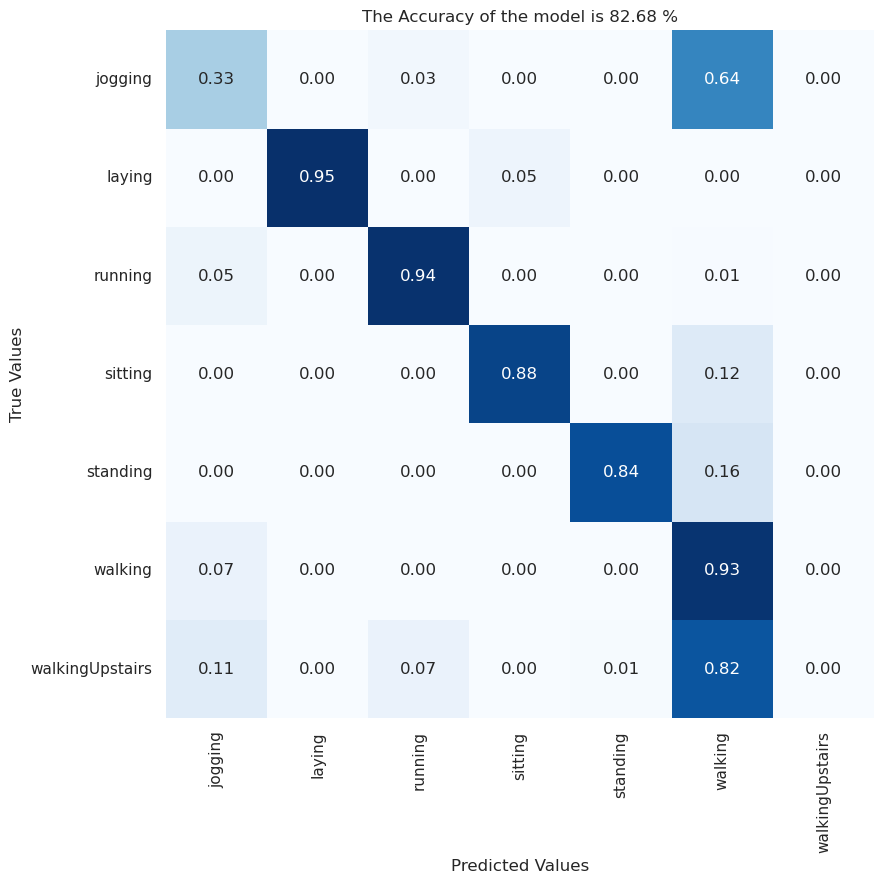

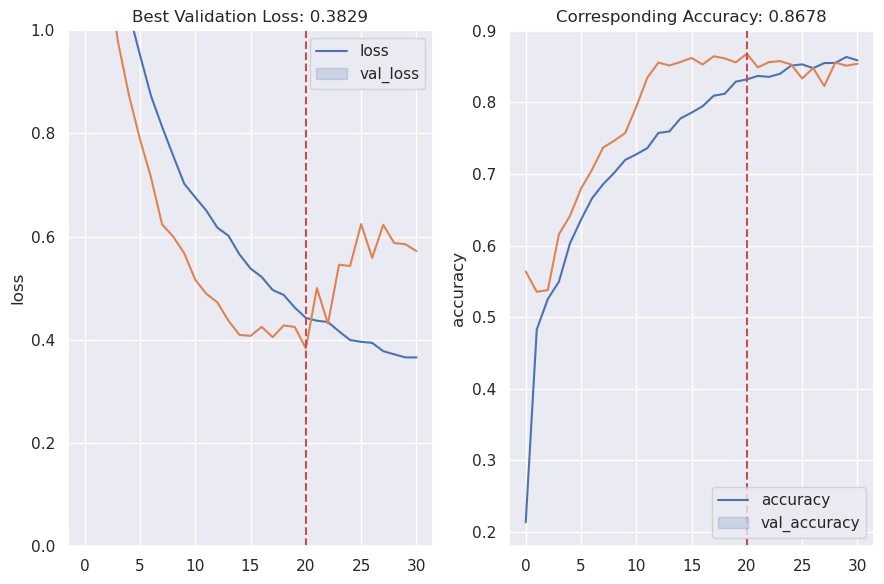

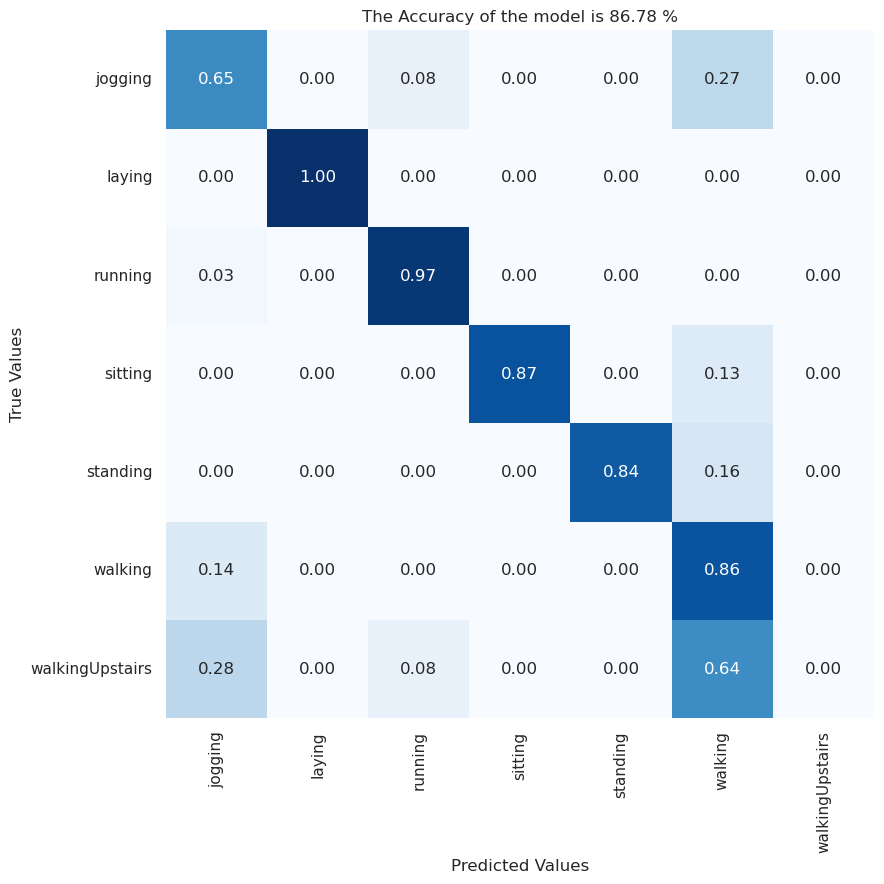

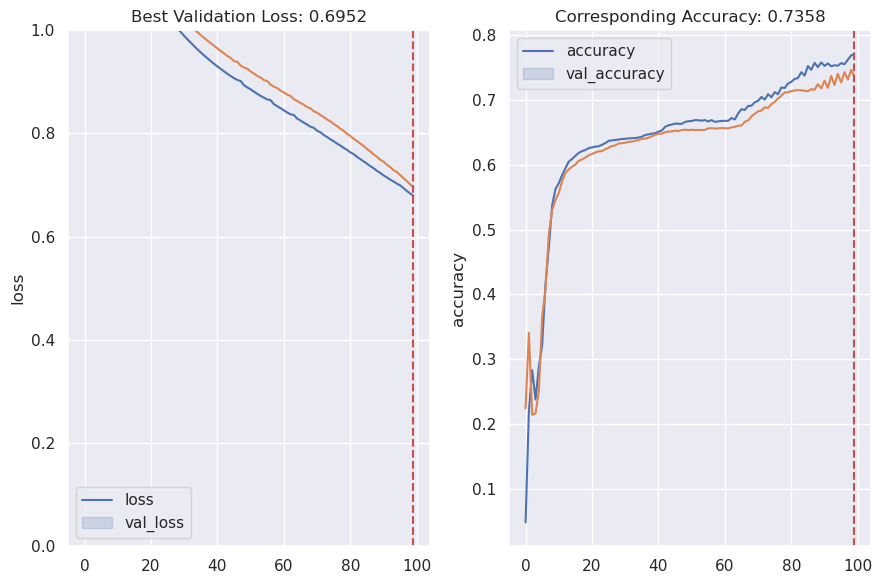

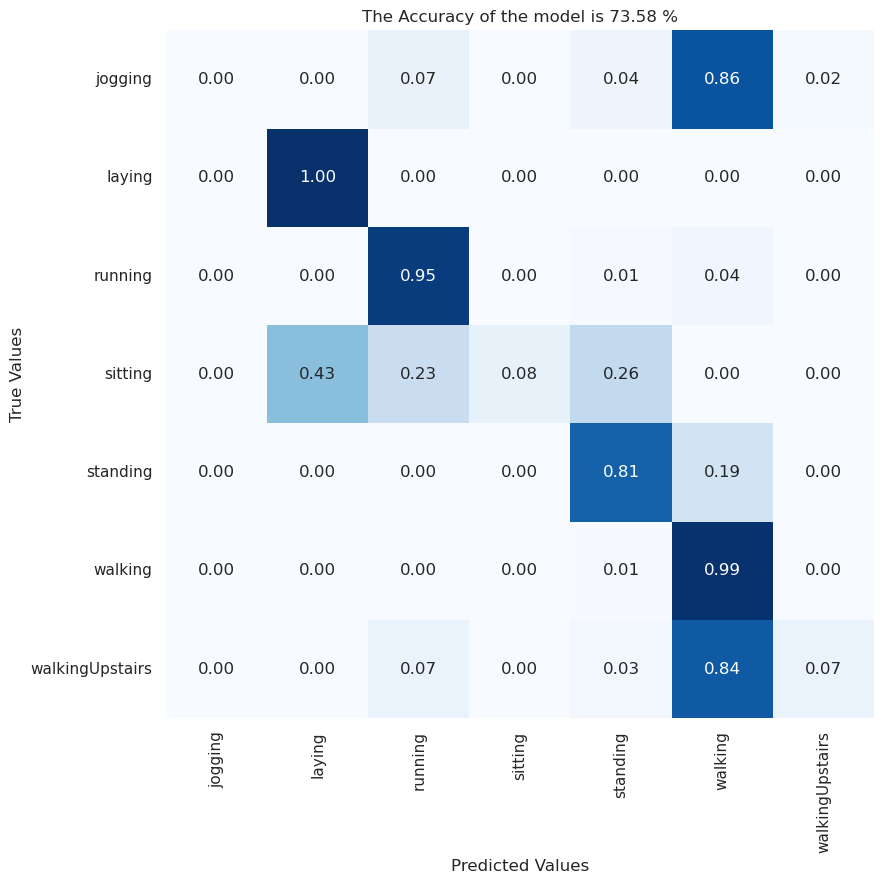

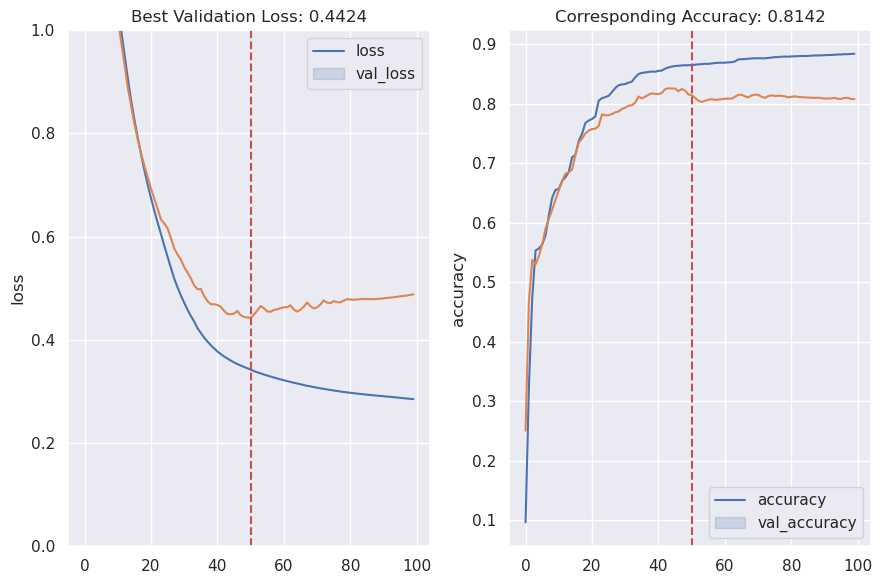

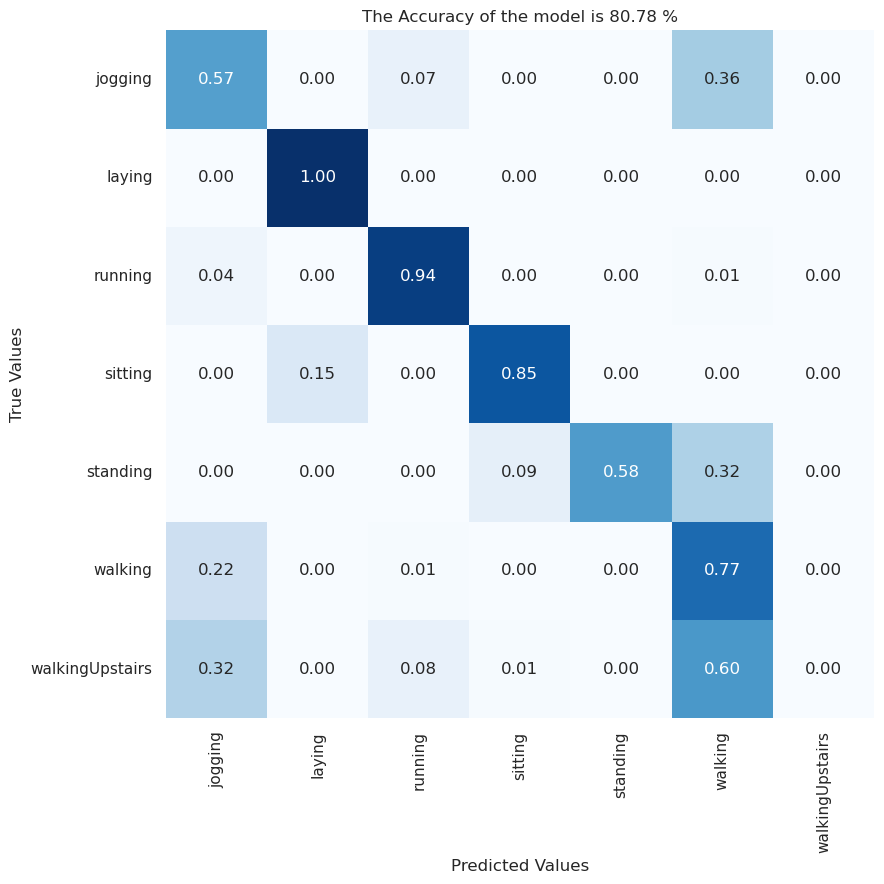

In [11]:
scores_df = run_models(model_func_list, model_dic, ak_dic, run_combinations=False)
# clear_output()
scores_df